# Import necessary libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

# Load the dataset

In [50]:
flights_df = pd.read_csv('flights.csv')

# Display the first few rows

In [51]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Display The Last Few Rows

In [52]:
flights_df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048574,2015,3,10,2,MQ,2916,N539MQ,CID,ORD,1013,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [53]:
flights_df.shape

(1048575, 31)

# Information on The Data Set

In [54]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

# Summary statistics

In [55]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1048575.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,1048575.0,1.694297,0.705151,1.0,1.0,2.0,2.0,3.0
DAY,1048575.0,13.820969,8.725656,1.0,6.0,13.0,21.0,31.0
DAY_OF_WEEK,1048575.0,3.953196,1.999436,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,1048575.0,2256.759063,1799.165837,1.0,755.0,1725.0,3485.0,9794.0
SCHEDULED_DEPARTURE,1048575.0,1322.631794,470.774829,1.0,920.0,1319.0,1720.0,2359.0
DEPARTURE_TIME,1009060.0,1333.704944,482.741534,1.0,928.0,1329.0,1731.0,2400.0
DEPARTURE_DELAY,1009060.0,11.334851,39.223721,-61.0,-5.0,-1.0,11.0,1988.0
TAXI_OUT,1008346.0,16.653802,10.070062,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,1008346.0,1357.381529,483.035110,1.0,944.0,1342.0,1745.0,2400.0


# Find out the sum of the duplicate values

In [56]:
flights_df.duplicated().sum()

0

# List the columns in a table using (tabulate)

In [57]:
from tabulate import tabulate

In [58]:
columns = flights_df.columns.tolist()
columns_df = pd.DataFrame(columns, columns=["Data Set Column Names"])
print(tabulate(columns_df, headers='keys', tablefmt='pretty'))

+----+-----------------------+
|    | Data Set Column Names |
+----+-----------------------+
| 0  |         YEAR          |
| 1  |         MONTH         |
| 2  |          DAY          |
| 3  |      DAY_OF_WEEK      |
| 4  |        AIRLINE        |
| 5  |     FLIGHT_NUMBER     |
| 6  |      TAIL_NUMBER      |
| 7  |    ORIGIN_AIRPORT     |
| 8  |  DESTINATION_AIRPORT  |
| 9  |  SCHEDULED_DEPARTURE  |
| 10 |    DEPARTURE_TIME     |
| 11 |    DEPARTURE_DELAY    |
| 12 |       TAXI_OUT        |
| 13 |      WHEELS_OFF       |
| 14 |    SCHEDULED_TIME     |
| 15 |     ELAPSED_TIME      |
| 16 |       AIR_TIME        |
| 17 |       DISTANCE        |
| 18 |       WHEELS_ON       |
| 19 |        TAXI_IN        |
| 20 |   SCHEDULED_ARRIVAL   |
| 21 |     ARRIVAL_TIME      |
| 22 |     ARRIVAL_DELAY     |
| 23 |       DIVERTED        |
| 24 |       CANCELLED       |
| 25 |  CANCELLATION_REASON  |
| 26 |   AIR_SYSTEM_DELAY    |
| 27 |    SECURITY_DELAY     |
| 28 |     AIRLINE_DELAY     |
| 29 |  

# Show the unique values in each column as long as the values aren't > 50

In [59]:
for col in flights_df.columns:
    if(len(flights_df[col].unique()) <= 50):
        print(col, flights_df[col].unique())

YEAR [2015]
MONTH [1 2 3]
DAY [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
DAY_OF_WEEK [4 5 6 7 1 2 3]
AIRLINE ['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
DIVERTED [0 1]
CANCELLED [0 1]
CANCELLATION_REASON [nan 'A' 'B' 'C' 'D']


# Check for missing values

In [60]:
print(flights_df.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64


# Data Visualization

# Visualizing Average Arrival Delays by Airline

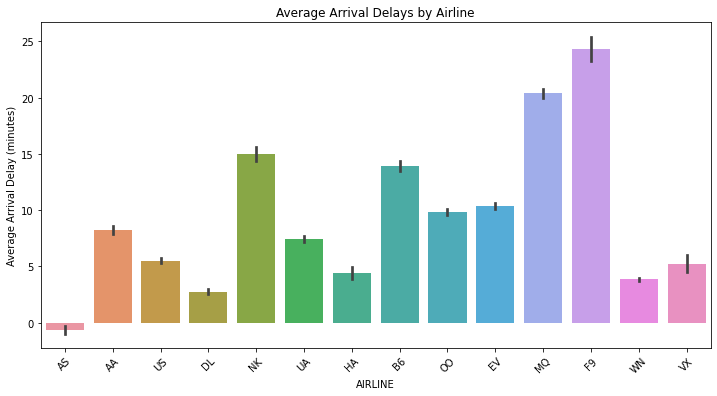

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=flights_df, estimator=np.mean)
plt.title('Average Arrival Delays by Airline')
plt.xticks(rotation=45)
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

# Correlation Matrix before filling the null values 

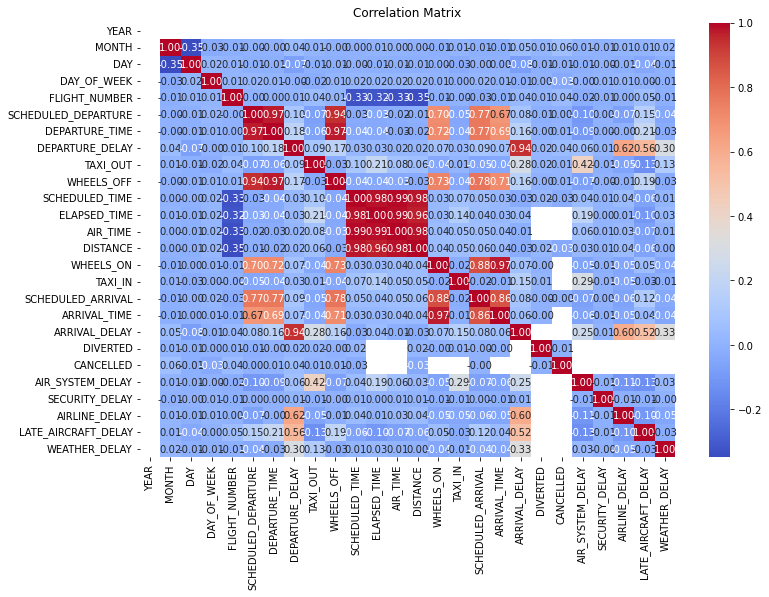

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(flights_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='count', ylabel='CANCELLATION_REASON'>

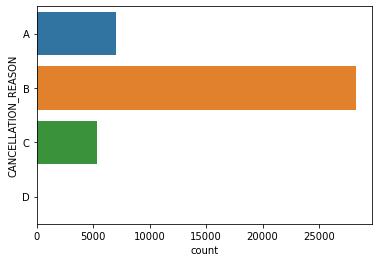

In [16]:
sns.countplot(data=flights_df[flights_df['CANCELLATION_REASON'].notnull()], y='CANCELLATION_REASON')

# fill the columns that has null values 

In [17]:
flights_df[flights_df.columns[25:31]] = flights_df[flights_df.columns[25:31]].fillna(value=0.0)

# We can't drop the rows which contains null in any column as for example the ELAPSED_TIME and AIR_TIME couldn't be recorded as the whole trip is canceled or diverted, let's see if the cancellation affects the elapsed_time and air_time.

# We can fill null the rows with 0s which have true in canceled or diverted.

In [18]:
flights_df[(flights_df['CANCELLED'] == 1) | (flights_df['DIVERTED'] == 1)]=flights_df[(flights_df['CANCELLED'] == 1) | (flights_df['DIVERTED'] == 1)].fillna(0)

# drop the column year as it has only one value which is the year ==> 2015

In [19]:
flights_df.drop('YEAR', axis=1,inplace=True)

# Check to see if the column year has been droped 

In [20]:
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# check to see if the null values has been delt with 

In [21]:
flights_df.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

# Correlation Matrix afetr filling null values

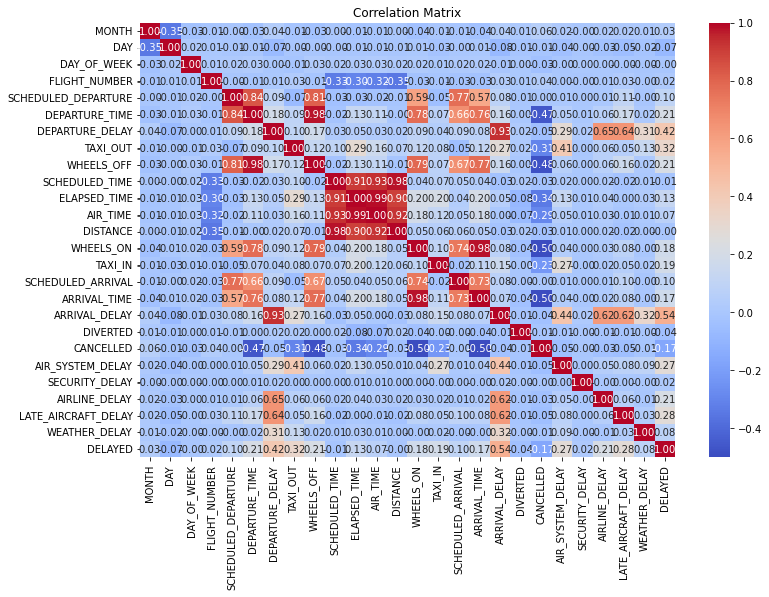

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(flights_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

### Define target variable

#### craete a column that defines whether a flight was delayed or not ==> true == 1 / false == 0

In [22]:
flights_df['DELAYED'] = (flights_df['ARRIVAL_DELAY'] > 0).astype(int)

# Features and target

In [23]:
features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 
            'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 
            'DISTANCE', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'WEATHER_DELAY', 
            'LATE_AIRCRAFT_DELAY', 'TAXI_OUT', 'TAXI_IN']

X = flights_df[features]
y = flights_df['DELAYED']


# One-hot encoding for categorical variables

In [24]:
X = pd.get_dummies(X, columns=['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], drop_first=True)

# Train-test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1:  Decision Tree Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# prediction

In [27]:
dt_predictions = dt.predict(X_test)

# evaluate the model
# calculate accuracy

In [28]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.761719476432301


# classification report

In [29]:
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80    124823
           1       0.71      0.70      0.70     84892

    accuracy                           0.76    209715
   macro avg       0.75      0.75      0.75    209715
weighted avg       0.76      0.76      0.76    209715



# confusion matrix

In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Confusion Matrix:
 [[100061  24762]
 [ 25209  59683]]


# Visualize the confusion matrix

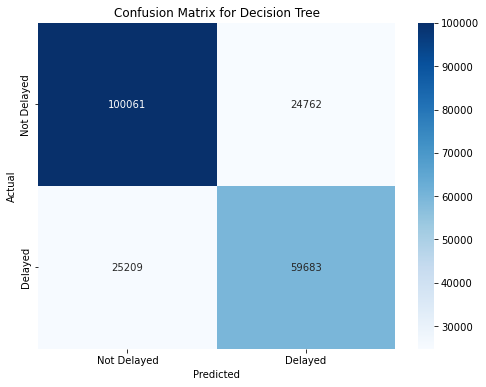

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2: Logistic Regression

In [32]:
lr = LogisticRegression(max_iter=4000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

# prediction

In [33]:
lr_predictions = lr.predict(X_test)

# * Evaluate the model
# Calculate accuracy

In [34]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.81835824809861


# classification report

In [35]:
print("Classification Report:\n", classification_report(y_test, lr_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86    124823
           1       0.90      0.62      0.73     84892

    accuracy                           0.82    209715
   macro avg       0.84      0.79      0.80    209715
weighted avg       0.83      0.82      0.81    209715



# confusion matrix

In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))

Confusion Matrix:
 [[119107   5716]
 [ 32377  52515]]


# Visualize the confusion matrix

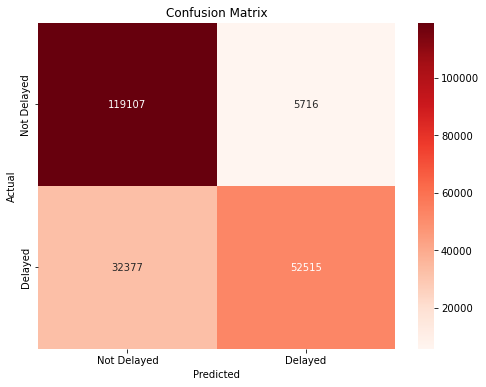

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2: Random Forest Classifier

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# prediction

In [39]:
rf_predictions = rf.predict(X_test)

# * Evaluate the model
# Calculate accuracy

In [40]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8321722337457979


# classification report

In [41]:
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87    124823
           1       0.90      0.66      0.76     84892

    accuracy                           0.83    209715
   macro avg       0.85      0.81      0.82    209715
weighted avg       0.84      0.83      0.83    209715



# confusion matrix

In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Confusion Matrix:
 [[118232   6591]
 [ 28605  56287]]


# Visualize the confusion matrix

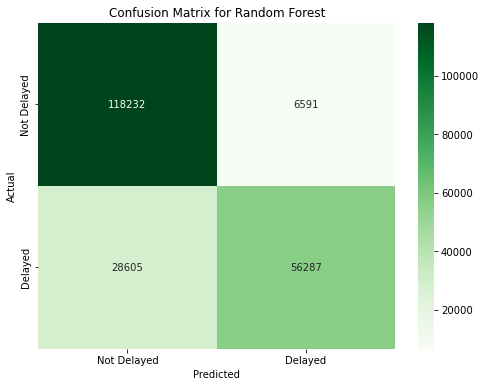

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()